In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data= pd.read_csv('C:/Users/Cold min/OneDrive/바탕 화면/인공지능/car.data')
df = pd.DataFrame(data=data)

In [4]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    df[i]=le.fit_transform(data[i])

In [7]:
df = pd.DataFrame(data=data)
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


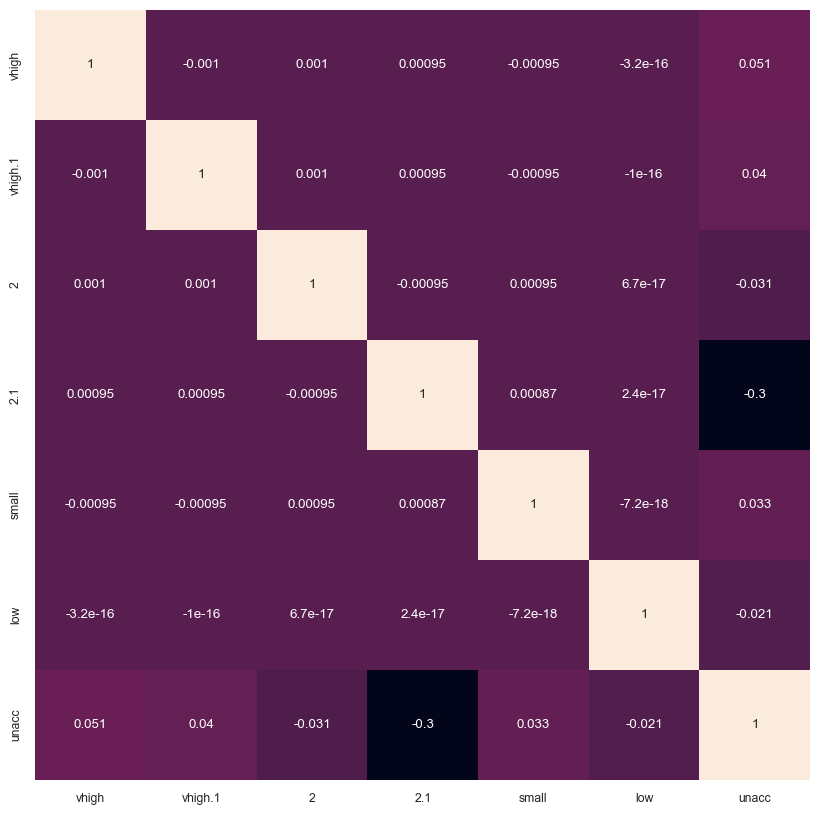

In [8]:
#상관 관계 행렬
data_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [9]:
X = df.drop('unacc', axis=1)
y = df['unacc']

In [10]:
# 데이터 분할
X = X.to_numpy()

In [11]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
# number of samples / number of time steps chosen per sample , number of parallel time series or features

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [12]:
X.shape

(1727, 6, 1)

In [13]:
y.value_counts()

2    1209
0     384
1      69
3      65
Name: unacc, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values



from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [15]:
n_steps = X.shape[1]
n_steps

6

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [41]:
#Defining the model 

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils


def build_model(): 
    model = models.Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GlobalAveragePooling1D())
    model.add(Flatten())
    model.add(Dense(60, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary()  

input_shape =>  6 1
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 2, 64)             384       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 global_average_pooling1d_4   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 60)                3900      
                                                                 
 dense_9 (Dense)             (None

In [42]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

Epoch 1/100
44/44 [==============================] - 1s 4ms/step - loss: 0.1188 - mse: 0.1188 - val_loss: 0.1121 - val_mse: 0.1121
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1030 - mse: 0.1030 - val_loss: 0.1095 - val_mse: 0.1095
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0992 - mse: 0.0992 - val_loss: 0.1043 - val_mse: 0.1043
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0960 - mse: 0.0960 - val_loss: 0.1033 - val_mse: 0.1033
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0941 - mse: 0.0941 - val_loss: 0.1034 - val_mse: 0.1034
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0926 - mse: 0.0926 - val_loss: 0.1010 - val_mse: 0.1010
Epoch 7/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0905 - mse: 0.0905 - val_loss: 0.0976 - val_mse: 0.0976
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0886 - m

44/44 [==============================] - 0s 2ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 64/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 65/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 66/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 67/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 68/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0489 - val_mse: 0.0489
Epoch 69/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 70/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0221 - mse: 0

In [43]:
test_mse_score

0.03779220953583717

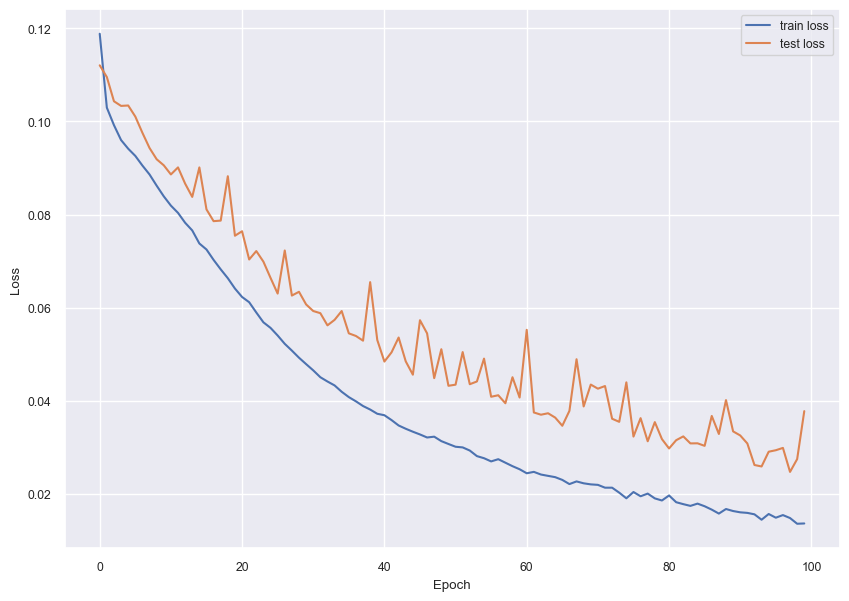

In [44]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

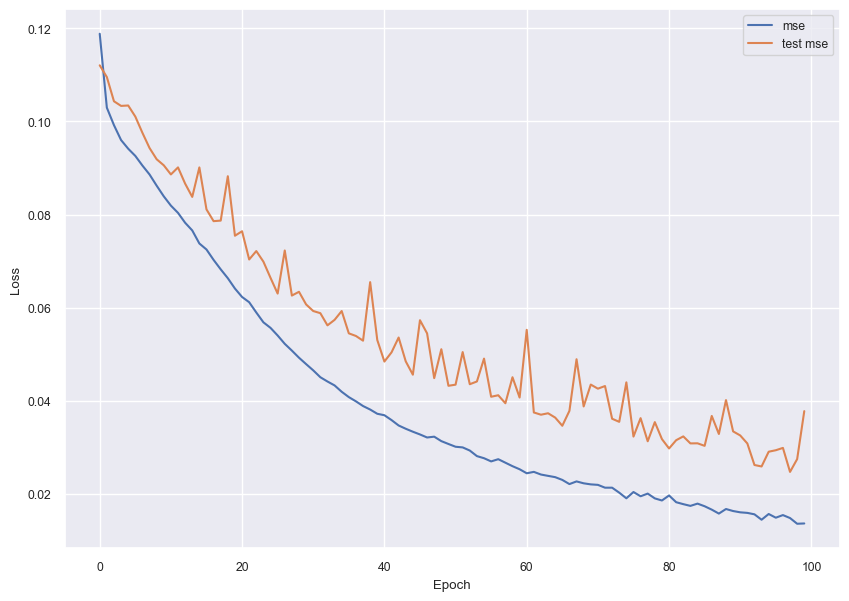

In [45]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()